# Визуализация данных   

С помощью фреймворка MatPlotLib визуализировать результаты аналитики из домашнего
задания №5

Визуализировать пункт 8

С помощью аналитики определить влияние всех признаков на признак Survived(выживание).
Пример: Parch и SibSP отрицательно влияли на выживание при крушении , так как чем
больше эти параметры тем ниже процент выживания (одиночке выжить проще).
Результатом домашнего задания будет Таблица в Colab с комментариями в качестве
ответов на пункты ДЗ.

In [83]:
import os

os.environ['KAGGLE_USERNAME'] = 'allyonz'
os.environ['KAGGLE_KEY'] = 'ab5a1cdfe3f647749ac1479b60169f16'
!kaggle datasets download -d heptapod/titanic


  0%|          | 0.00/10.8k [00:00<?, ?B/s]
100%|██████████| 10.8k/10.8k [00:00<00:00, 1.24MB/s]


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# загрузка данных
dataset = pd.read_csv('titanik.csv')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [85]:
rows, cols = dataset.shape
print(f"В исходном датасете {rows} строк")
print(f"В исходном датасете {cols} столбцов")

В исходном датасете 891 строк
В исходном датасете 12 столбцов


<Axes: >

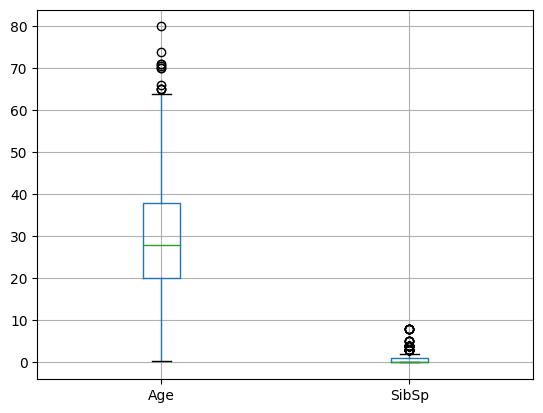

In [94]:
dataset[['Age', 'SibSp']].boxplot()

In [93]:
fig = plt.figure(figsize = (9, 6)) #Figure

<Figure size 900x600 with 0 Axes>

Количество выживших и умерших в зависимости от возраста (*возраст берется в
интервалах 10 лет)

In [103]:
dataset = dataset.dropna()

#разделим выборку по выживанию
isSurvived = dataset['Survived'] == 1
#print(isSurvived)

isDied = dataset['Survived'] == 0
# print(isDied)

dataset_survived = dataset.loc[isSurvived]
dataset_died = dataset.loc[isDied]

# print(dataset_died)


Survived
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
dtype: object

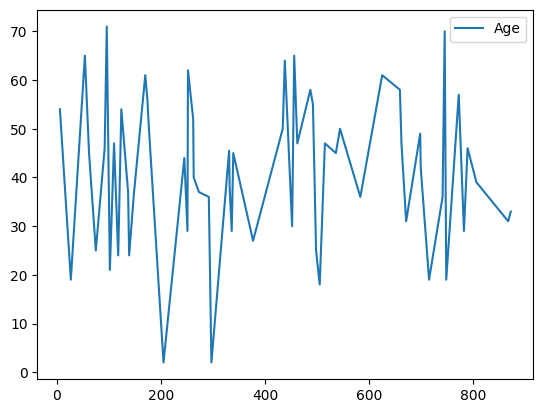

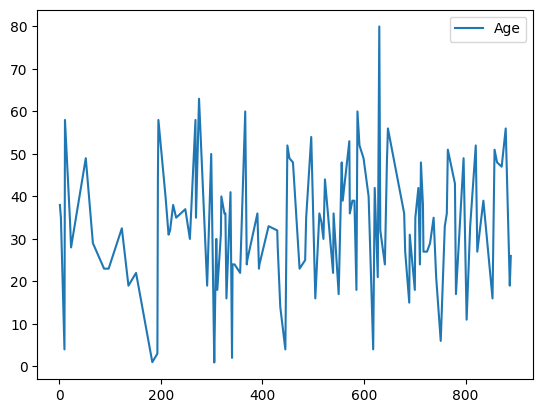

In [104]:
dataset.groupby('Survived')[['Age', 'Ticket']].plot()

In [32]:
# def show_plot(data, x_points, color, label, xylabel, title):
def show_plot(data, x_points, color):
    '''
    Функция для отображения гистограммы
    @param data - данные, массив столбцов
    @param x_points - массив точек оси Х
    @param color - массив цветов для графиков
    @param label - подписи легенда
    @param xylabel - подписи осей
    @param title - заголовок
    '''
    plt.hist(data, x_points, color)
    # plt.hist(data, x_points, color, label)
    # plt.legend(loc='upper right') #расположение легенды
    # plt.xlabel(xylabel[0])
    # plt.ylabel(xylabel[1])
    # plt.title(title)
    plt.show()


10.0


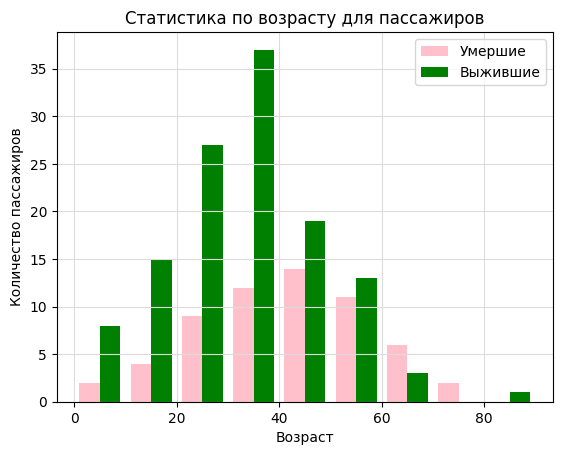

In [119]:
data_to_plot_age = [dataset_died['Age'], dataset_survived['Age']]
# # print(data_to_plot)
# min = 0
# max = 80
# cnt = 10
# x_points = np.linspace(min, max, cnt)

# color = ['gray', 'blue']

# show_plot(data_to_plot, x_points, color)


x_points, step = np.linspace(0, 90, 10, retstep=True)
print (step)
plt.hist(data_to_plot_age, x_points, color = ['pink', 'green'], label=['Умершие', 'Выжившие'])
plt.legend(loc='upper right')
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.title("Статистика по возрасту для пассажиров")
plt.grid(color="gainsboro") # Сетка
plt.show()

In [122]:
# распределение по возрасту
age_median = dataset['Age'].median()
age_mean = dataset['Age'].mean()
age_mode = dataset['Age'].mode()[0]
print(f"Медиана {age_median}")
print(f"Ср знач {age_mean}")
print(f"Мода {age_mode}")

Медиана 36.0
Ср знач 35.6744262295082
Мода 36.0


[<Axes: > <Axes: >]


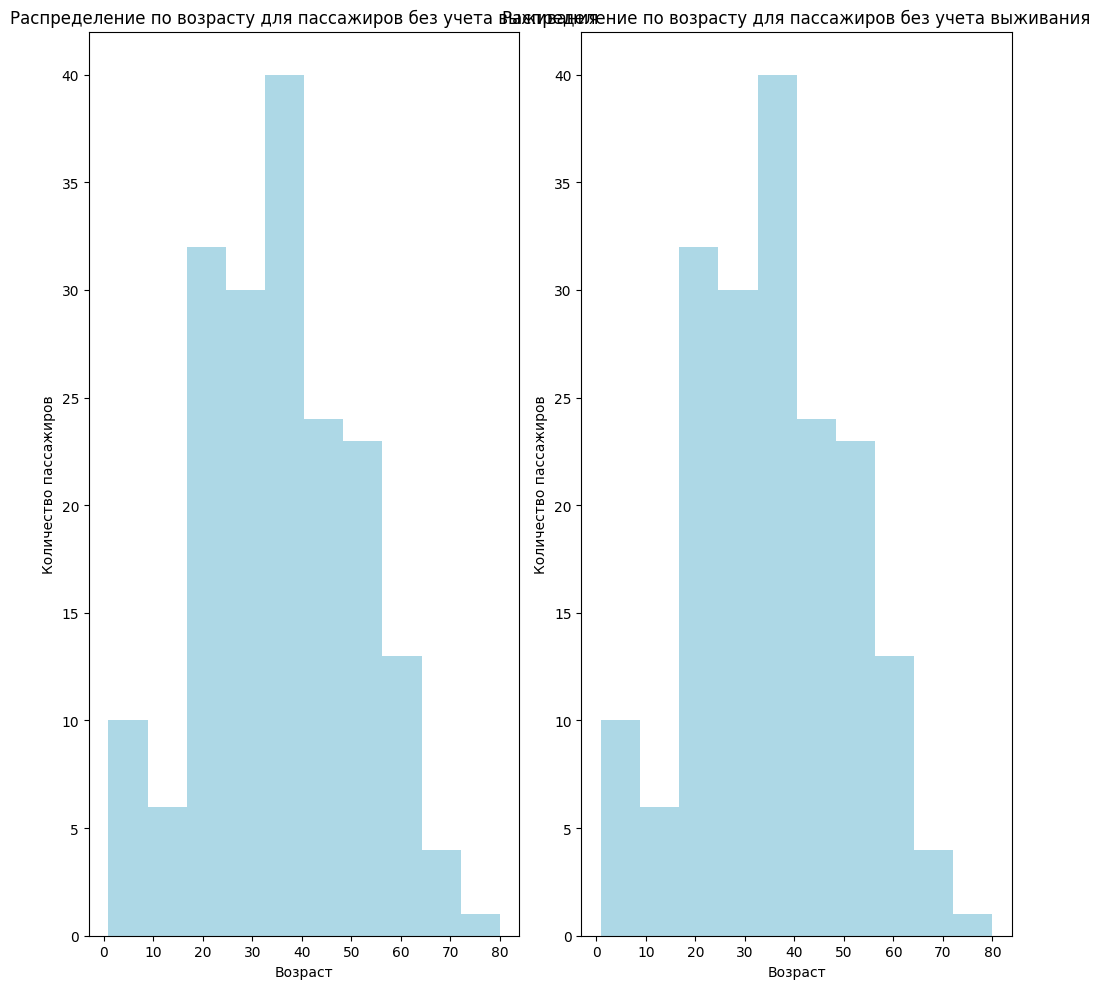

In [136]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10, 10))
print(axes)

plt.subplot(1, 2, 1)
plt.hist(dataset['Age'], color = ['lightblue'])
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.title("Распределение по возрасту для пассажиров без учета выживания")

plt.subplot(1, 2, 2)
plt.hist(dataset['Age'], color = ['lightblue'])
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.title("Распределение по возрасту для пассажиров без учета выживания")


plt.tight_layout()
plt.show()

<Axes: >

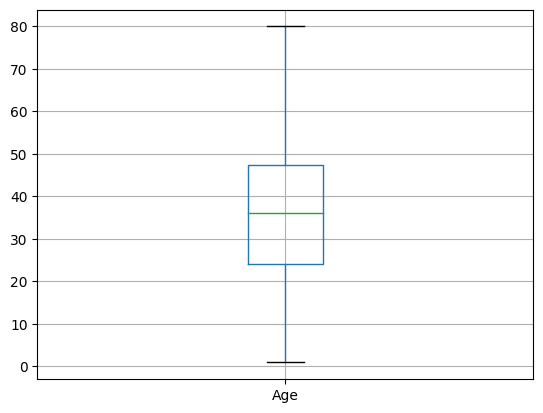

In [138]:
dataset[['Age']].boxplot()

In [148]:
!pip install --upgrade nbformat

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [150]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


H1: от тарифа зависит выживаемость пассажира. Чем выше тариф, тем выше шансы выжить

In [151]:
px.box(dataset[['Fare']])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare', 'Fare',
                          'Fare', 'Fare', 'Fare'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': array([ 71.2833,  53.1   ,  51.8625,  16.7   ,  26.55  ,  13.    ,  35.5   ,
                          263.    ,  76.7292,  61.9792,  83.475 ,  10.5   ,   7.65  , 263.    ,
                           61.175 ,  34.6542,  63.3583,  77.2875,  52.    , 247.5208,  13.    ,
                           77.2875,  26.2833,  53.1   ,  79.2   ,  26.    ,  66.6   ,  33.5   ,
                           30.6958,  28.7125,  39.    ,  26.    ,  27.7208, 146.5208,  10.4625,
                           31.    , 113.275 ,  76.2917,  90.    ,  83.475 ,  90.    ,  52.5542,
                           10.4625,  26.55  ,  86.5   ,  79.65  ,   0.    , 153.4625, 135.6333,
                           29.7   ,  77.9583,  91.0792,  12.875 , 151.55  , 247.5208, 151.55  ,
                          108.9   ,  56.9292,  83.1583, 262.375 , 164.8667, 134.5   , 135.6333,
                           13.    ,  57.9792,  28.5   , 153.4625,  66.6   , 134.5   ,  35.5   ,
                           26.    , 263.    ,  13.    ,  55.    ,  75.25  ,  69.3   ,  55.4417,
                          211.5   , 120.    , 113.275 ,  16.7   ,  90.    ,   8.05  ,  26.55  ,
                           55.9   , 120.    , 263.    ,  81.8583,  30.5   ,  27.75  ,  89.1042,
                           26.55  ,  26.55  ,  38.5   ,  13.7917,  91.0792,  90.    ,  29.7   ,
                           30.5   ,  78.2667, 151.55  ,  86.5   , 108.9   ,  26.2875,  34.0208,
                           10.5   ,  93.5   ,  57.9792,  26.55  ,  49.5   ,  71.    , 1

In [152]:
dataset['Fare']

1      71.2833
3      53.1000
6      51.8625
10     16.7000
11     26.5500
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 183, dtype: float64

In [157]:
bins_fare = [0, 8, 15, 30, 120]
dataset['Fare_category'] = pd.cut(dataset['Fare'], bins=bins_fare, labels=['Дешевый', 'Средний', 'Выше среднего', 'Дорогой'])
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_category
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Дорогой
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Дорогой
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Дорогой
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Выше среднего
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Выше среднего


In [158]:
dataset_survived = dataset.loc[isSurvived]
dataset_died = dataset.loc[isDied]

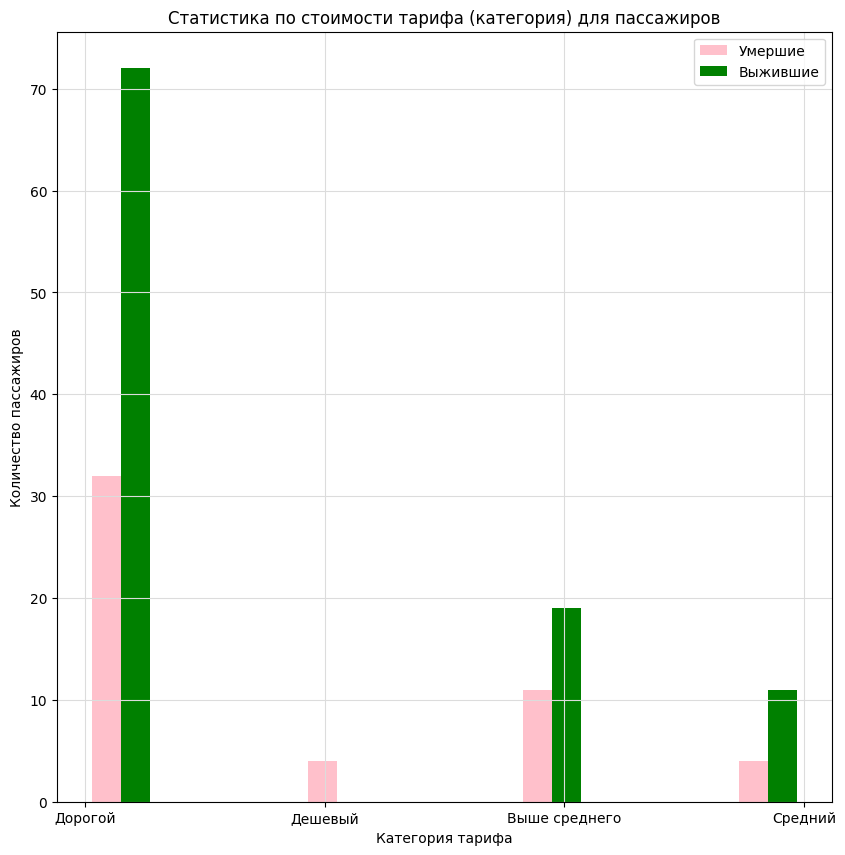

In [187]:
FARE_CAT_COUNT = 4

fig, ax = plt.subplots(figsize = (10, 10))

data_to_plot_fare = [dataset_died.dropna()['Fare_category'], dataset_survived.dropna()['Fare_category']]
plt.hist(data_to_plot_fare, align='mid', color = ['pink', 'green'], label=['Умершие', 'Выжившие'])

xtick = [i for i in range(FARE_CAT_COUNT)]

plt.legend(loc='upper right')
plt.xlabel("Категория тарифа")
plt.ylabel("Количество пассажиров")
plt.title("Статистика по стоимости тарифа (категория) для пассажиров")
plt.grid(color="gainsboro") # Сетка
ax.set_xticks(xtick)
plt.show()

In [47]:
dataset_died['Pclass'].describe()

count    60.000000
mean      1.216667
std       0.584885
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       3.000000
Name: Pclass, dtype: float64

In [54]:
#разделим выборку по классам
firstClass = dataset['Pclass'] == 1
secondClass = dataset['Pclass'] == 2
thirdClass = dataset['Pclass'] == 3

dataset_01 = dataset.loc[firstClass]
dataset_02 = dataset.loc[secondClass]
dataset_03 = dataset.loc[thirdClass]
# print(dataset_01)

<Axes: >

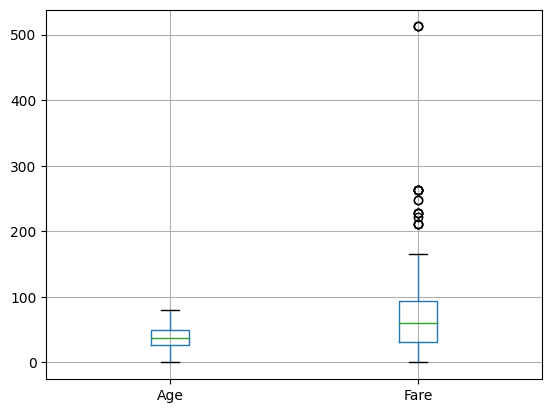

In [72]:
dataset_01[['Age', 'Fare']].boxplot()


<Axes: >

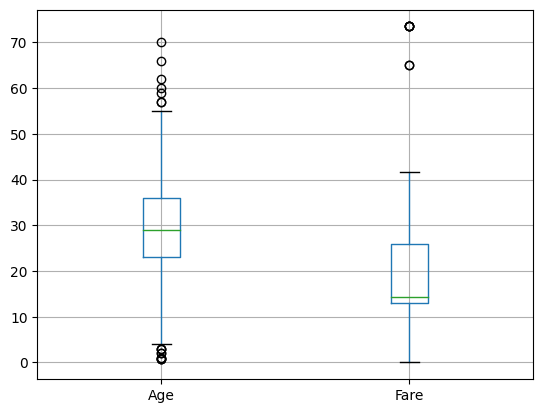

In [69]:
dataset_02[['Age', 'Fare']].boxplot()


<Axes: >

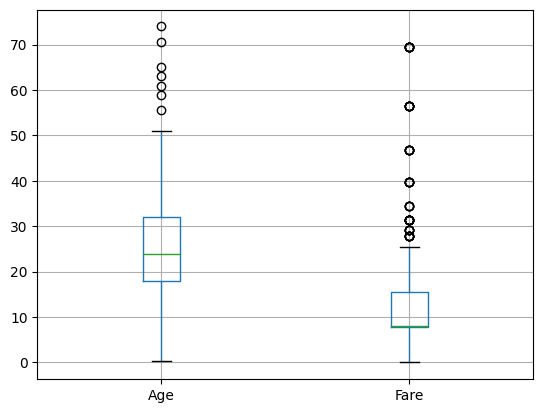

In [70]:
dataset_03[['Age', 'Fare']].boxplot()

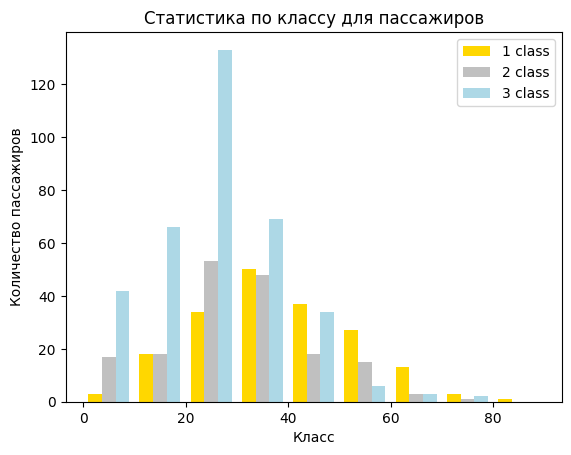

In [120]:
data_to_plot_pclass = [dataset_01['Age'], dataset_02['Age'], dataset_03['Age']]
# print(data_to_plot_pclass)
# print(dataset_died['Pclass'])
# # print(data_to_plot)
# min = 0
# max = 80
# cnt = 10
# x_points = np.linspace(min, max, cnt)

# color = ['gray', 'blue']

# show_plot(data_to_plot, x_points, color)


bins = np.linspace(0, 90, 10)
plt.hist(data_to_plot_pclass, bins, color = ['gold', 'silver', 'lightblue'], label=["1 class", "2 class", "3 class"])
plt.legend(loc='upper right')
plt.xlabel("Класс")
plt.ylabel("Количество пассажиров")
plt.title("Статистика по классу для пассажиров")
plt.show()